In [1]:
# import libs
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
#from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [2]:
global_confirm = pd.read_csv('time_series_covid19_confirmed_global.csv', sep=',',header=0)
US_confirm = pd.read_csv('time_series_covid19_confirmed_US.csv', sep=',',header=0)
global_death = pd.read_csv('time_series_covid19_deaths_global.csv', sep=',',header=0)
US_death = pd.read_csv('time_series_covid19_deaths_US.csv', sep=',',header=0)
global_recover = pd.read_csv('time_series_covid19_recovered_global.csv', sep=',',header=0)

In [3]:
global_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


In [5]:
global_confirm_by_country = global_confirm.groupby('Country/Region').sum()

In [10]:
global_confirm_by_country_trans=global_confirm_by_country.drop(['Lat', 'Long'], axis=1)
global_confirm_by_country_trans = global_confirm_by_country_trans.T
global_confirm_by_country_trans.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,2,0,0,0


In [12]:
global_confirm_by_country_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1/22/20 to 4/4/20
Columns: 181 entries, Afghanistan to Zimbabwe
dtypes: int64(181)
memory usage: 105.2+ KB


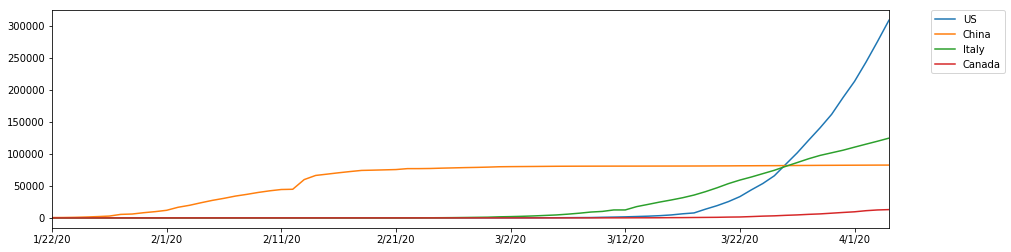

In [29]:
#Confirmed Covid 19 by Country
global_confirm_by_country_trans['US'].plot.line(figsize=(15, 4), subplots=False,Label = 'US')
global_confirm_by_country_trans['China'].plot.line(figsize=(15, 4), subplots=False,Label = 'China')
global_confirm_by_country_trans['Italy'].plot.line(figsize=(15, 4), subplots=False,Label = 'Italy')
global_confirm_by_country_trans['Canada'].plot.line(figsize=(15, 4), subplots=False,Label = 'Canada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

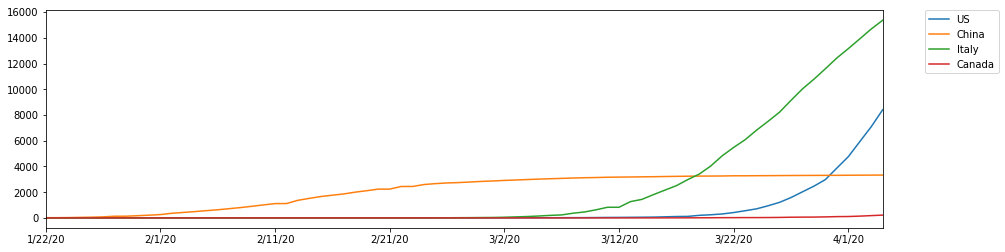

In [32]:
#Death Covid 19 by Country
global_death_by_country = global_death.groupby('Country/Region').sum()
global_death_by_country_trans=global_death_by_country.drop(['Lat', 'Long'], axis=1)
global_death_by_country_trans = global_death_by_country_trans.T

global_death_by_country_trans['US'].plot.line(figsize=(15, 4), subplots=False,Label = 'US')
global_death_by_country_trans['China'].plot.line(figsize=(15, 4), subplots=False,Label = 'China')
global_death_by_country_trans['Italy'].plot.line(figsize=(15, 4), subplots=False,Label = 'Italy')
global_death_by_country_trans['Canada'].plot.line(figsize=(15, 4), subplots=False,Label = 'Canada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

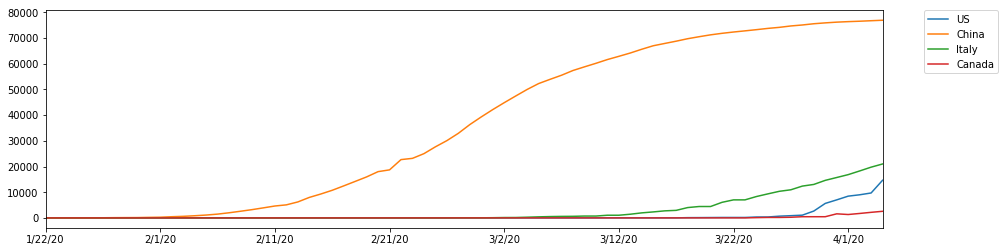

In [33]:
#Recover Covid 19 by Country
global_recover_by_country = global_recover.groupby('Country/Region').sum()
global_recover_by_country_trans=global_recover_by_country.drop(['Lat', 'Long'], axis=1)
global_recover_by_country_trans = global_recover_by_country_trans.T

global_recover_by_country_trans['US'].plot.line(figsize=(15, 4), subplots=False,Label = 'US')
global_recover_by_country_trans['China'].plot.line(figsize=(15, 4), subplots=False,Label = 'China')
global_recover_by_country_trans['Italy'].plot.line(figsize=(15, 4), subplots=False,Label = 'Italy')
global_recover_by_country_trans['Canada'].plot.line(figsize=(15, 4), subplots=False,Label = 'Canada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

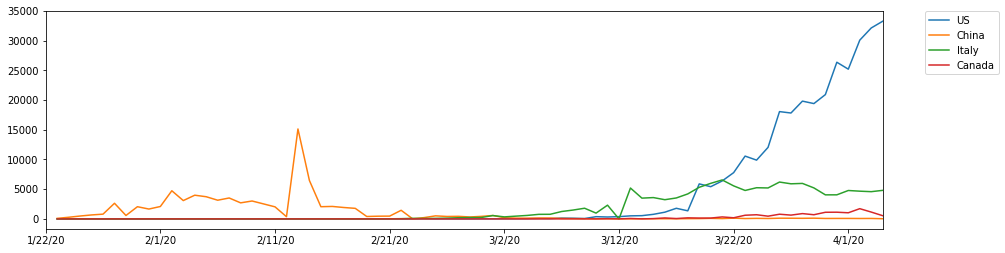

In [38]:
#New Daily New Cases

global_confirm_daily_new_US = global_confirm_by_country_trans['US']-global_confirm_by_country_trans['US'].shift(1)
global_confirm_daily_new_China = global_confirm_by_country_trans['China']-global_confirm_by_country_trans['China'].shift(1)
global_confirm_daily_new_Italy = global_confirm_by_country_trans['Italy']-global_confirm_by_country_trans['Italy'].shift(1)
global_confirm_daily_new_Canada = global_confirm_by_country_trans['Canada']-global_confirm_by_country_trans['Canada'].shift(1)

global_confirm_daily_new_US.plot.line(figsize=(15, 4), subplots=False,Label = 'US')
global_confirm_daily_new_China.plot.line(figsize=(15, 4), subplots=False,Label = 'China')
global_confirm_daily_new_Italy.plot.line(figsize=(15, 4), subplots=False,Label = 'Italy')
global_confirm_daily_new_Canada.plot.line(figsize=(15, 4), subplots=False,Label = 'Canada')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [49]:
global_confirm_by_country_trans['US'].head()

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
1/26/20    5
Name: US, dtype: int64

In [50]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [145]:
US_Model = global_confirm_daily_new_US.dropna()
US_Model.head()

1/23/20    0.0
1/24/20    1.0
1/25/20    0.0
1/26/20    3.0
1/27/20    0.0
Name: US, dtype: float64

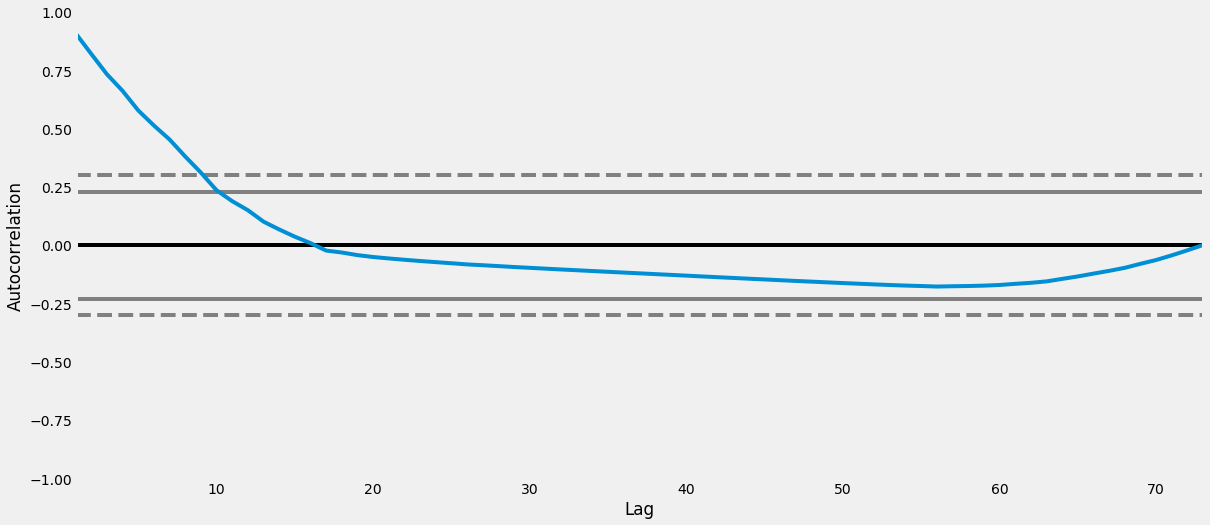

In [146]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(US_Model)
pyplot.show()

In [239]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
 
# fit model
#model = ARIMA(US_Model, order=(5,1,0))

model = ARMA(US_Model, order=(0,5))

model_fit = model.fit(disp=0)

In [240]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5019.7641   1571.470      3.194      0.002    1939.740    8099.788
ma.L1.US       1.3682      0.117     11.664      0.000       1.138       1.598
ma.L2.US       1.6559      0.157     10.549      0.000       1.348       1.964
ma.L3.US       1.6924      0.165     10.260      0.000       1.369       2.016
ma.L4.US       1.3048      0.145      9.020      0.000       1.021       1.588
ma.L5.US       0.6766      0.091      7.469      0.000       0.499       0.854


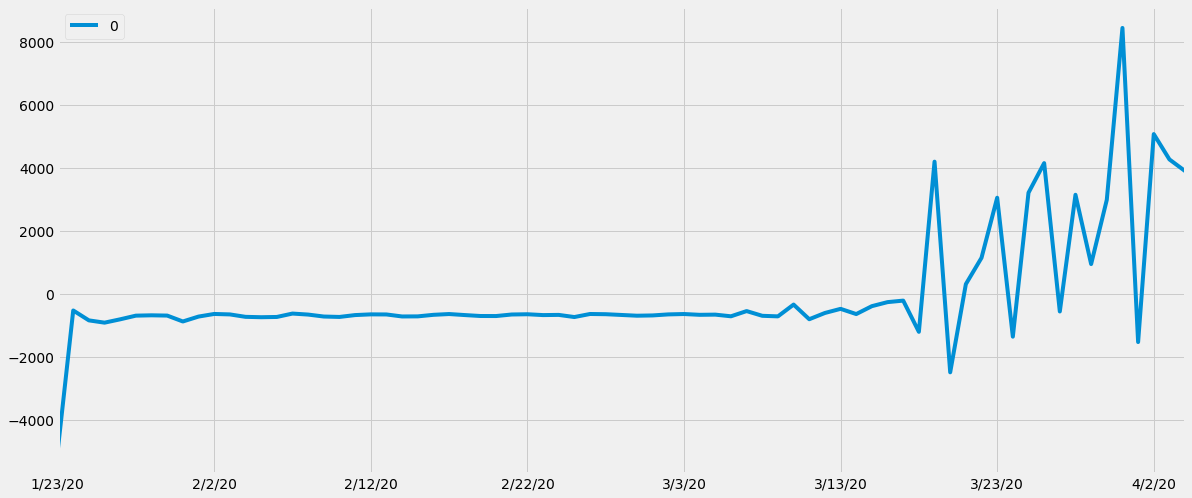

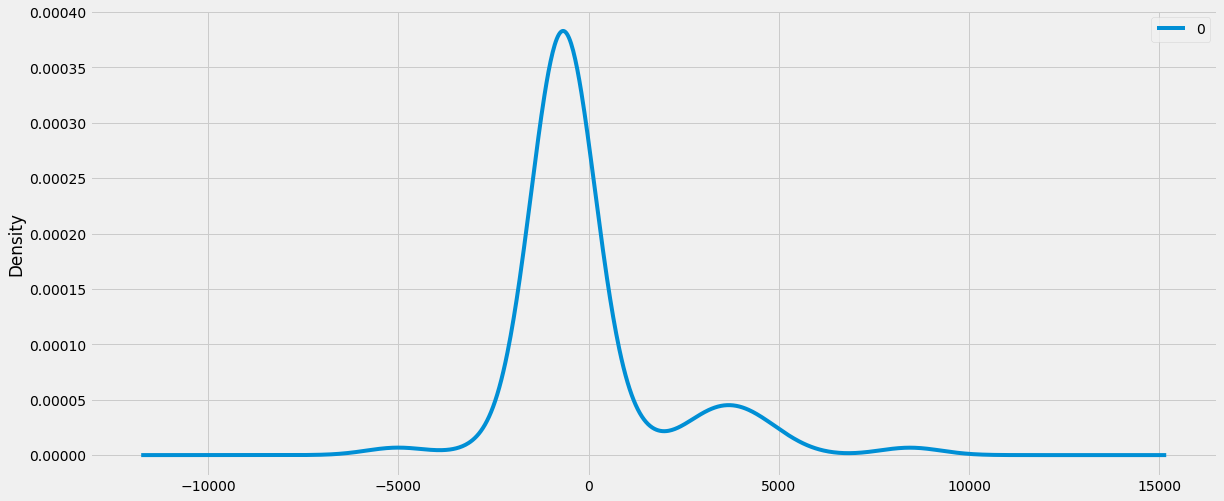

                 0
count    73.000000
mean    -35.468753
std    1927.389678
min   -5019.764089
25%    -710.923374
50%    -655.666593
75%    -523.303540
max    8445.996619


In [241]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

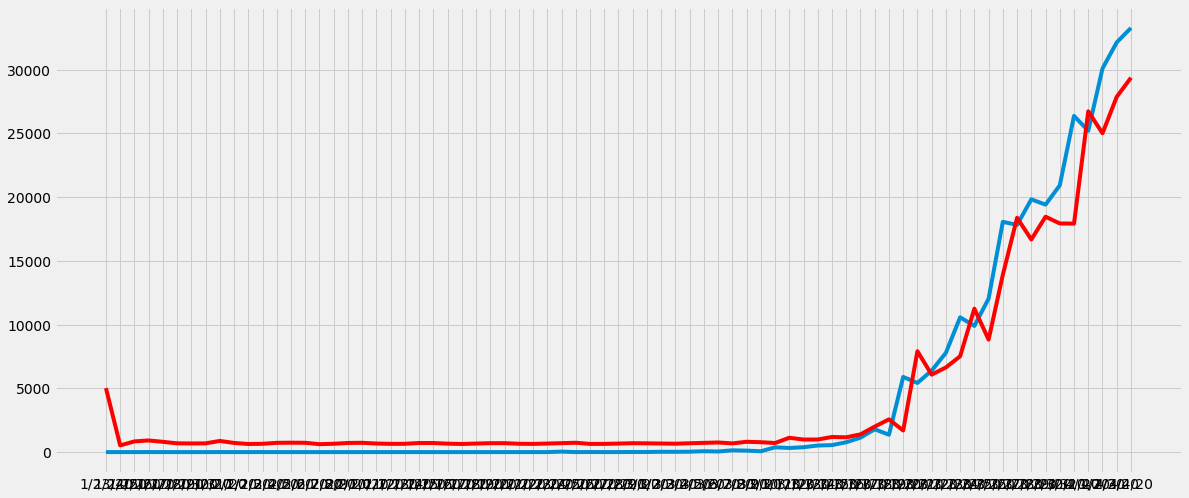

In [242]:
# Compare expected with forcast

plt.plot(US_Model,Label = 'Actual')
plt.plot(model_fit.fittedvalues, color='red',Label = 'predict')